# US Accients Exploratory Data Analysis

## About this project: <a class="anchor" id="About this project"></a>
This project aims to analyze the provided dataset to discover insights that can be visually expressed through the data. The specific objectives include:

* Clean and organize the data to ensure consistency and integrity of information.
* Conduct exploratory data analysis to identify patterns, trends, and potential anomalies.
* Validate correlations between the number of accidents and weather conditions through statistical analysis and visualization techniques.
* Graphically represent findings creatively and effectively to clearly communicate conclusions derived from data analysis.

## About the Dataset: <a class="anchor" id="Data"></a>
The dataset is a compilation of automobile accidents nationwide covering 49 states of the USA. Data were collected from February 2016 to March 2023 using multiple APIs providing real-time traffic incident data. These APIs transmit traffic data captured by various entities including US and state transportation departments, law enforcement agencies, traffic cameras, and sensors within road networks. The dataset currently comprises approximately 7.7 million accident records.


## Acknowledgement: <a class="anchor" id="Data"></a>
Acknowledgments go to the dataset creators, including Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and others, for their work in compiling and creating the dataset. Their dedication and efforts have provided a valuable source of information for research and analysis of traffic accidents nationwide in the United States.

## Loading the Data
This section entails importing the dataset from a CSV file using the Pandas library. The necessary libraries will be imported, and the first 5 rows of the dataset will be visualized.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_path = '/kaggle/input/us-accidents/US_Accidents_March23.csv'
US_Accidents = pd.read_csv(file_path)
US_Accidents.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


## Data Information


This section explores the dataset US_Accidents, which contains information about various attributes related to car accidents in the US. This includes details like the accident severity, location coordinates, weather conditions, and road features such as crossings and junctions. They've inspected the dataset's columns, checked for missing values, and provided descriptive statistics to understand the numerical features' distributions and characteristics.

In [4]:
US_Accidents.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
US_Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
print(US_Accidents.describe())

           Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  7.728394e+06  7.728394e+06  7.728394e+06  4.325632e+06  4.325632e+06   
mean   2.212384e+00  3.620119e+01 -9.470255e+01  3.626183e+01 -9.572557e+01   
std    4.875313e-01  5.076079e+00  1.739176e+01  5.272905e+00  1.810793e+01   
min    1.000000e+00  2.455480e+01 -1.246238e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.339963e+01 -1.172194e+02  3.346207e+01 -1.177543e+02   
50%    2.000000e+00  3.582397e+01 -8.776662e+01  3.618349e+01 -8.802789e+01   
75%    2.000000e+00  4.008496e+01 -8.035368e+01  4.017892e+01 -8.024709e+01   
max    4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  7.728394e+06    7.564541e+06   5.729375e+06  7.554250e+06   
mean   5.618423e-01    6.166329e+01   5.825105e+01  6.483104e+01   
std    1.776811e+00    1.901365e+01   2.238983e+01  2.282097e+01   
min    0.000000e

## Data Cleaning

In this section the missingno library is utilized to visualize missing values in their dataset US_Accidents. After identifying columns with missing data, the percentage of missing values for each column is calculated and dropped those with more than 25% missing data. Additionally, Columns not relevant to the analysis are dropped and removed rows with any remaining missing values.

In [7]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

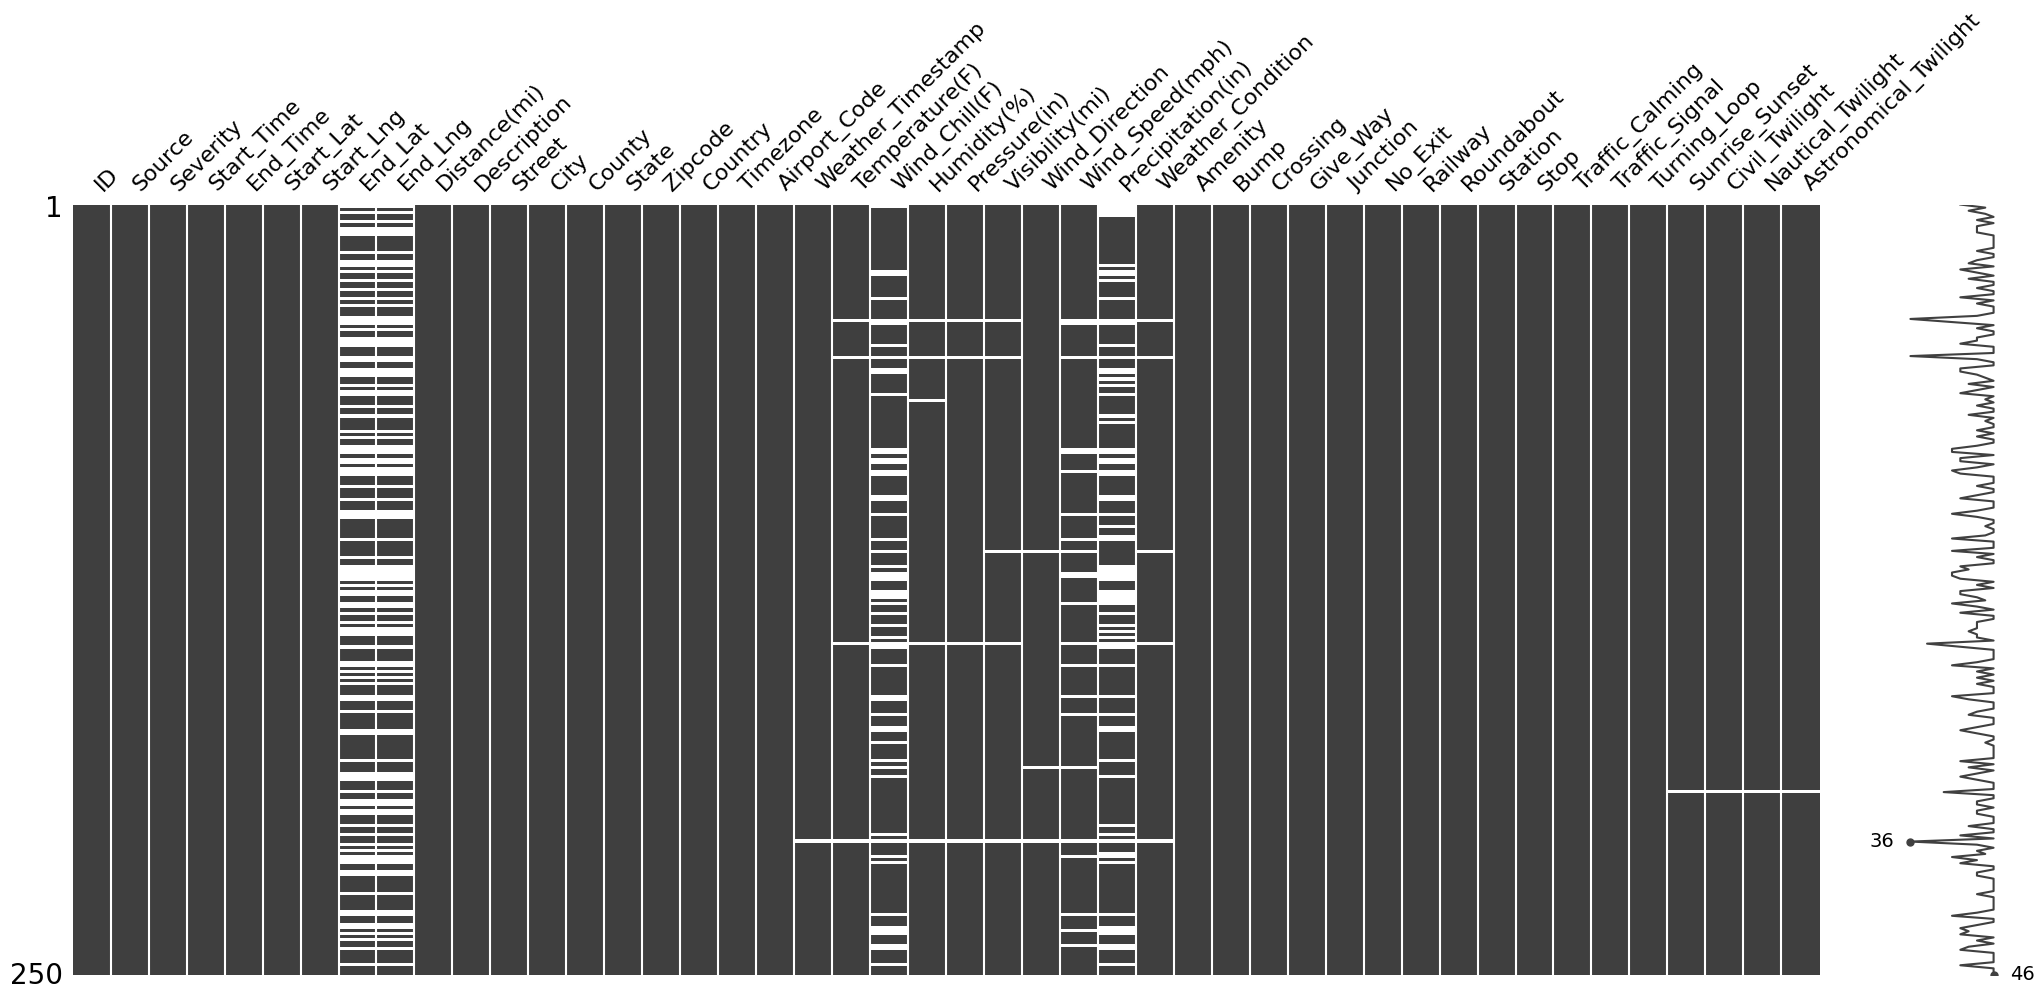

In [8]:
#Visualising Missing Values
import missingno as msno
msno.matrix(US_Accidents.sample(250))

In [9]:
# see what columns have missing data
US_Accidents.isnull().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

In [10]:
# see are the missing value by Percentage
missing_percentage = US_Accidents.isnull().sum().sort_values(ascending=False)/len(US_Accidents)*100
missing_percentage

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

In [11]:
# Dropping columns with more than 25% missing percentage
columns_to_drop = missing_percentage[missing_percentage > 25].index
US_Accidents = US_Accidents.drop(columns=columns_to_drop)

In [12]:
#Dropping columns that are not part of the analysis
# List of columns to drop
columns_to_drop = ['ID','Source', 'Description', 'Start_Lat', 'Start_Lng', 'County', 'Zipcode', 'Timezone', 'Airport_Code',
                   'Wind_Direction', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
# Drop the columns
US_Accidents = US_Accidents.drop(columns=columns_to_drop)

# Drop rows with null values in any column
US_Accidents = US_Accidents.dropna()

print(US_Accidents.head())

   Severity           Start_Time             End_Time  Distance(mi)  \
2         2  2016-02-08 06:49:27  2016-02-08 07:19:27          0.01   
3         3  2016-02-08 07:23:34  2016-02-08 07:53:34          0.01   
4         2  2016-02-08 07:39:07  2016-02-08 08:09:07          0.01   
5         3  2016-02-08 07:44:26  2016-02-08 08:14:26          0.01   
6         2  2016-02-08 07:59:35  2016-02-08 08:29:35          0.00   

                      Street          City State Country    Weather_Timestamp  \
2             State Route 32  Williamsburg    OH      US  2016-02-08 06:56:00   
3                     I-75 S        Dayton    OH      US  2016-02-08 07:38:00   
4  Miamisburg Centerville Rd        Dayton    OH      US  2016-02-08 07:53:00   
5             Westerville Rd   Westerville    OH      US  2016-02-08 07:51:00   
6             N Woodward Ave        Dayton    OH      US  2016-02-08 07:56:00   

   Temperature(F)  ...  Junction  No_Exit  Railway  Roundabout Station   Stop  \
2    

## Exploratory Analysis and Visualization¶

In this section, various perspectives are explored. Data analysis includes location-based examination, date-related insights, study of atmospheric factors' impact, and analysis based on traffic characteristics.

### Analysis By Location

This section initially examines the cities and states with the highest accident rates. Following that, a detailed analysis is conducted on the top three states with the most accidents. The primary cities are identified, along with their percentage relative to the rest of the state.

In [13]:
# Get the top 20 cities with the most accidents
accidents_by_city = US_Accidents['City'].value_counts()

top_20_cities = accidents_by_city.head(20)
print("Top 20 Cities with the Most Accidents:")
print(top_20_cities)

Top 20 Cities with the Most Accidents:
City
Miami            180834
Houston          155749
Los Angeles      131887
Charlotte        128267
Dallas           126393
Orlando          106431
Austin            84441
Raleigh           80875
Nashville         70081
Baton Rouge       68165
Sacramento        62617
Atlanta           61976
San Diego         52505
Minneapolis       50417
Phoenix           48782
Oklahoma City     44859
Richmond          44113
Jacksonville      40551
Tucson            37144
Greenville        35812
Name: count, dtype: int64


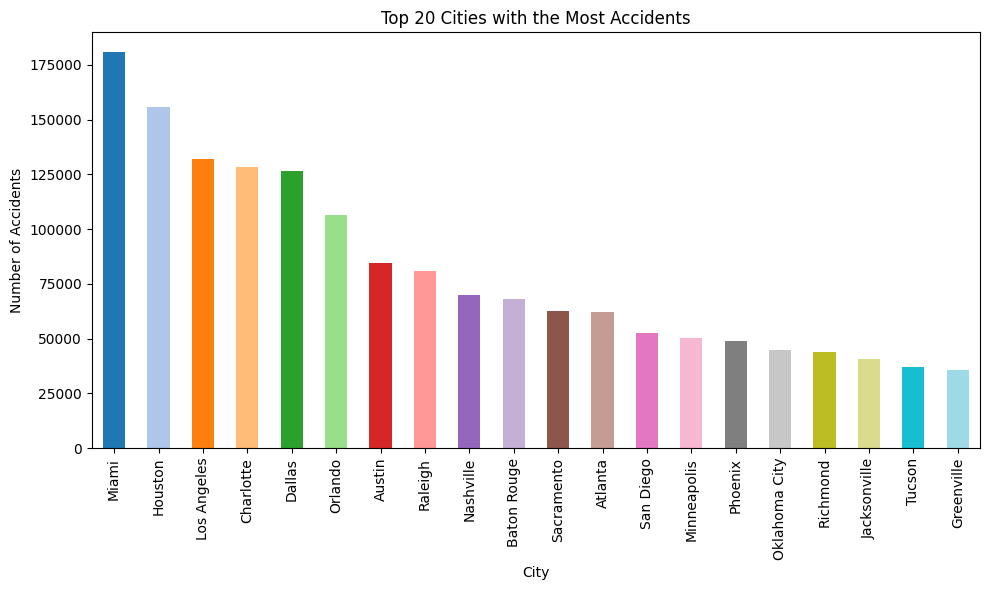

In [14]:
# Create the bar plot
plt.figure(figsize=(10, 6))
color_range = range(50)
top_20_cities.plot(kind='bar', color=plt.get_cmap('tab20')(range(len(color_range))))

plt.title('Top 20 Cities with the Most Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Show the bar plot
plt.tight_layout()
plt.show()


In [15]:
# Get the top 20 Stateswith the most accidents
accidents_by_state = US_Accidents['State'].value_counts()

top_20_states = accidents_by_state.head(20)
print("Top 20 States with the Most Accidents:")
print(top_20_states)

Top 20 States with the Most Accidents:
State
CA    1557457
FL     829647
TX     536438
SC     348587
NY     325866
NC     308891
PA     269485
VA     267992
MN     181436
OR     165075
IL     161714
TN     158464
MI     154743
AZ     153552
GA     151180
LA     141770
NJ     124290
OH     110296
MD     103328
WA      97311
Name: count, dtype: int64


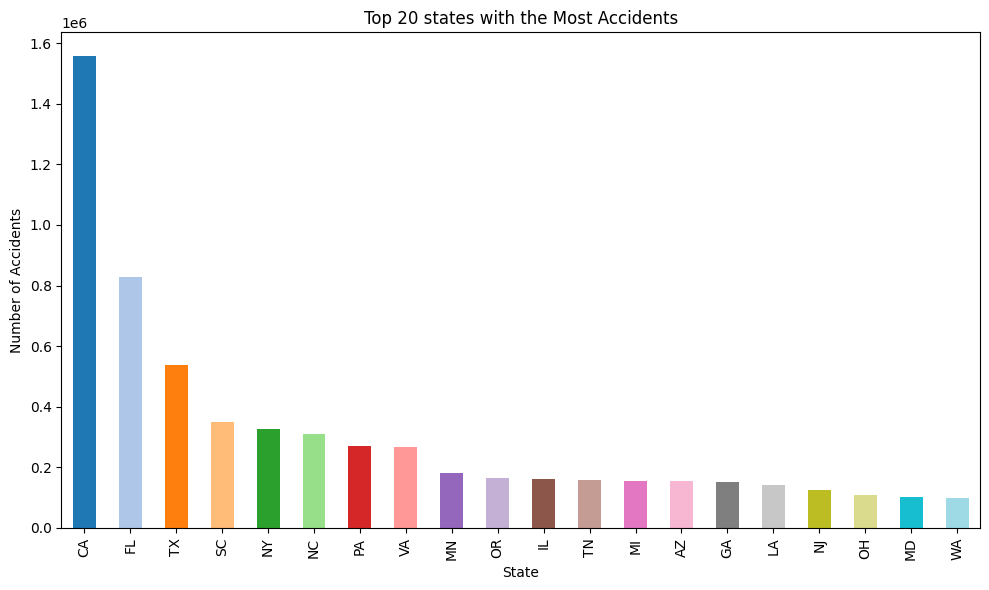

In [16]:
# Create the bar plot
plt.figure(figsize=(10, 6))
top_20_states.plot(kind='bar',color=plt.get_cmap('tab20')(range(len(color_range))))

plt.title('Top 20 states with the Most Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')

# Show the bar plot
plt.tight_layout()
plt.show()

### Analysis by Date

In this section, the data is disaggregated based on the 'Start_Time' column, examining the frequency and percentage of accidents by year, day of the week, and time. Additionally, the analysis distinguishes between weekdays and weekends due to their distinct patterns of behavior

In [17]:
#Changing the Time Format
print(US_Accidents['Start_Time'].head())

2    2016-02-08 06:49:27
3    2016-02-08 07:23:34
4    2016-02-08 07:39:07
5    2016-02-08 07:44:26
6    2016-02-08 07:59:35
Name: Start_Time, dtype: object


In [18]:
# Convert the 'Start_Time' column to datetime object
US_Accidents.Start_Time = pd.to_datetime(US_Accidents.Start_Time, errors='coerce')

year = US_Accidents['Start_Time'].dt.year
month = US_Accidents['Start_Time'].dt.month
dayofweek = US_Accidents['Start_Time'].dt.dayofweek
hour = US_Accidents['Start_Time'].dt.hour
weekday_hour = US_Accidents[US_Accidents['Start_Time'].dt.dayofweek < 5]['Start_Time'].dt.hour
weekend_hour = US_Accidents[US_Accidents['Start_Time'].dt.dayofweek >= 5]['Start_Time'].dt.hour


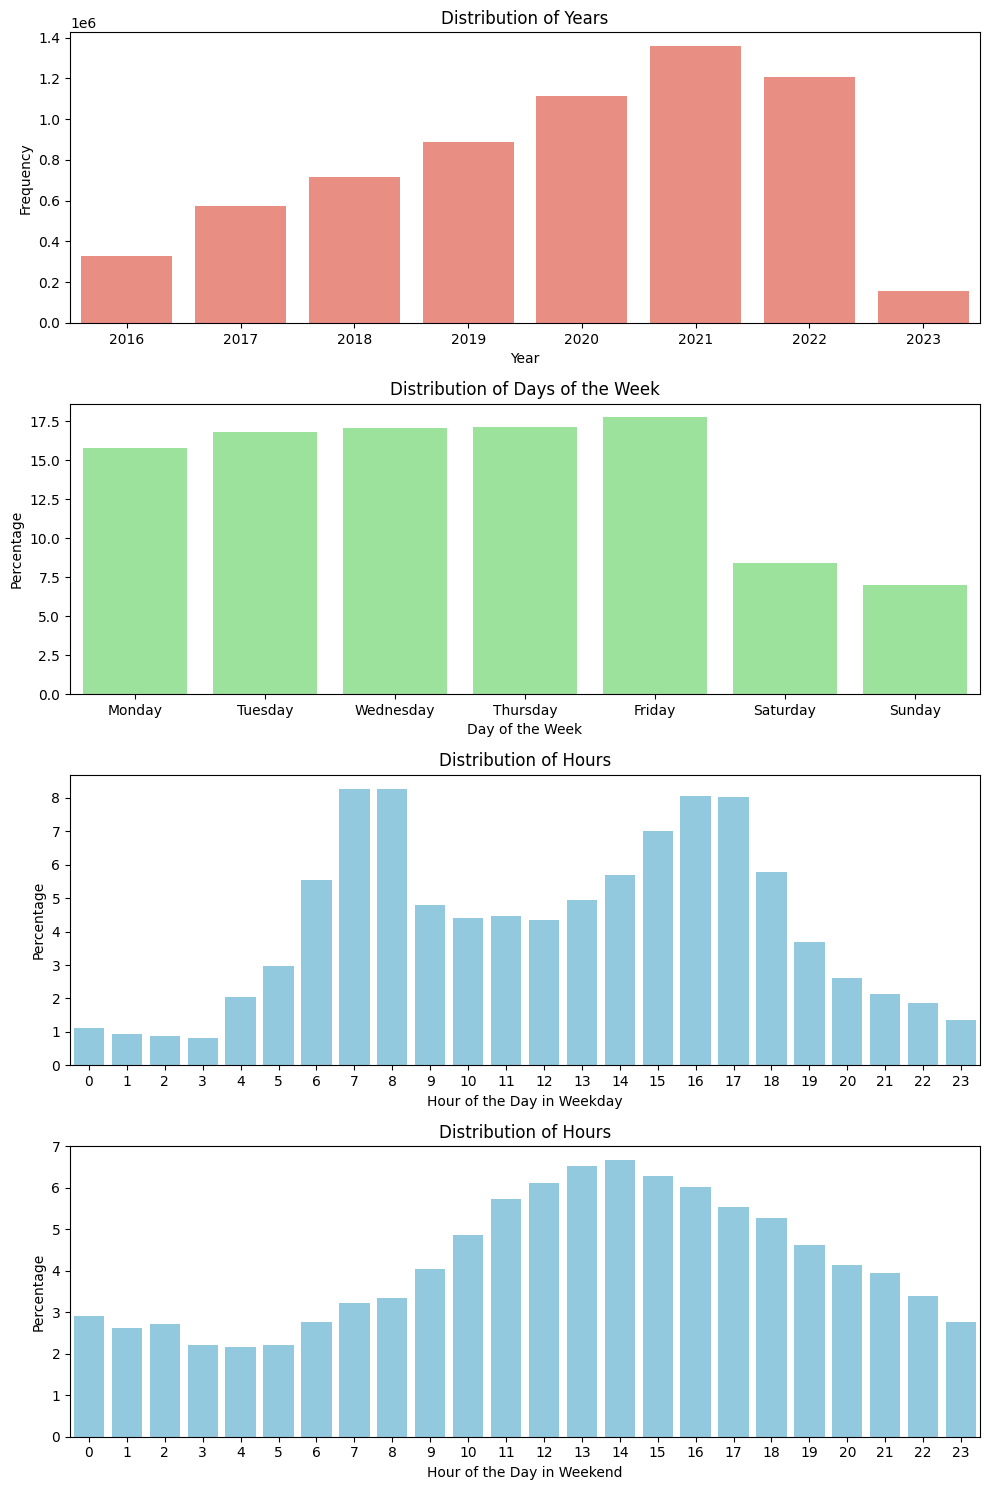

In [19]:
# Create histograms for hours, years, and days of the week
fig, axes = plt.subplots(4, 1, figsize=(10, 15))

# Histogram for years
year_frequency = (year.value_counts()).sort_index()
sns.barplot(x=year_frequency.index.astype(int), y=year_frequency.values, ax=axes[0], color='salmon')
axes[0].set_title('Distribution of Years')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Frequency')

# Histogram for days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_percentage = (dayofweek.value_counts(normalize=True) * 100).sort_index()
sns.barplot(x=day_percentage.index, y=day_percentage.values, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Days of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Percentage')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(days)


# Histogram for Hours in Weekdays
hour_percentage = (weekday_hour.value_counts(normalize=True) * 100).sort_index()
sns.barplot(x=hour_percentage.index.astype(int), y=hour_percentage.values, ax=axes[2], color='skyblue')
axes[2].set_title('Distribution of Hours')
axes[2].set_xlabel('Hour of the Day in Weekday')
axes[2].set_ylabel('Percentage')

# Histogram for Hours in Weekends
hour_percentage = (weekend_hour.value_counts(normalize=True) * 100).sort_index()
sns.barplot(x=hour_percentage.index.astype(int), y=hour_percentage.values, ax=axes[3], color='skyblue')
axes[3].set_title('Distribution of Hours')
axes[3].set_xlabel('Hour of the Day in Weekend')
axes[3].set_ylabel('Percentage')
plt.tight_layout()
plt.show()


### Analysis by Weather

This chapter aims to discern the impact of weather conditions on accident occurrences by examining factors such as temperature, humidity, and wind speed. These factors are juxtaposed with annual average values to highlight deviations from the norm. The analysis focuses on the top three states with the highest accident rates. Finally, a bar graph is presented to visualize the distribution of climate conditions.

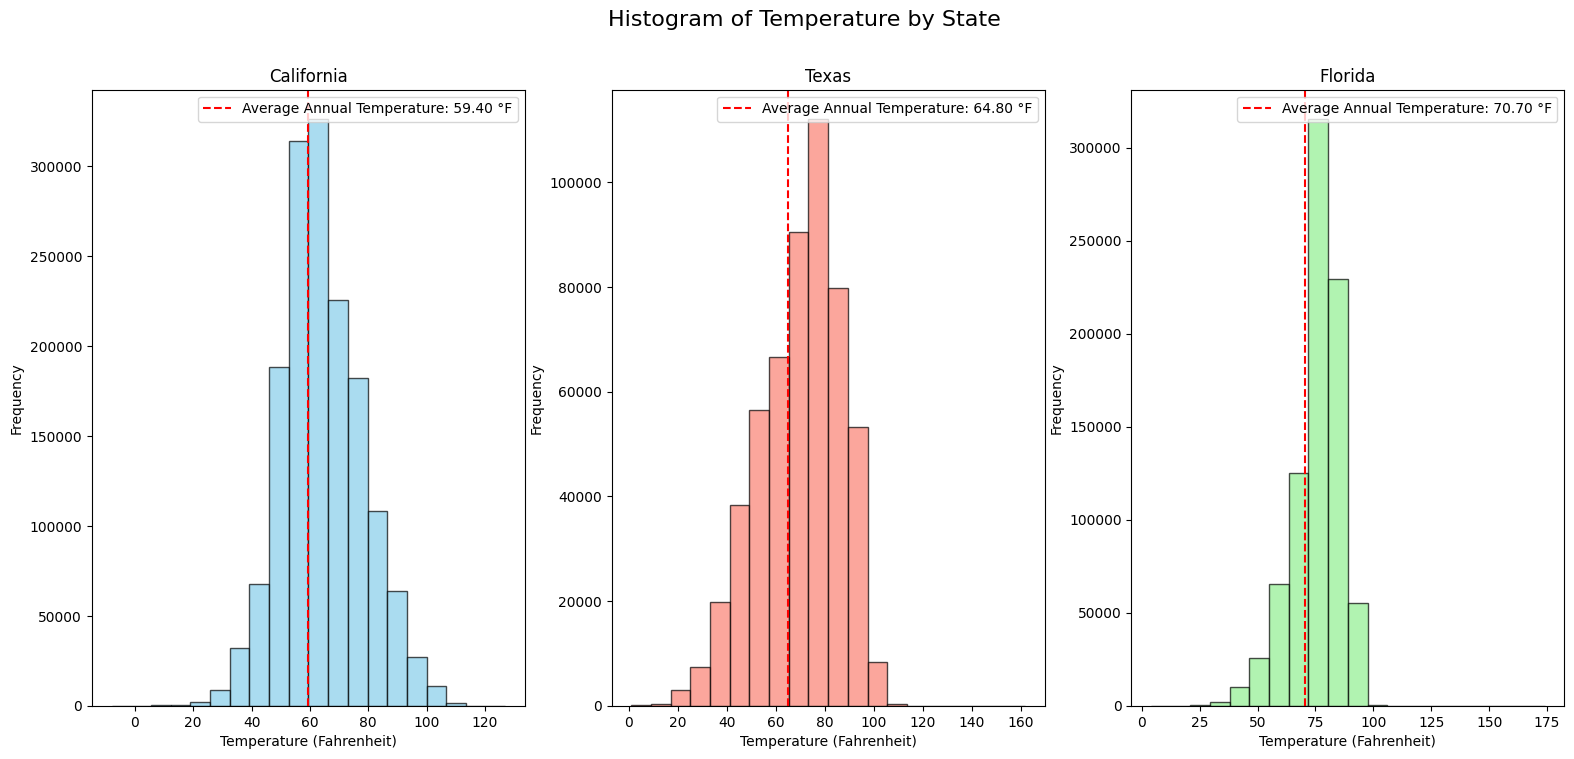

In [21]:
# Filter data for California, Texas, and Florida
california_data = US_Accidents[US_Accidents['State'] == 'CA']['Temperature(F)'].dropna()
texas_data = US_Accidents[US_Accidents['State'] == 'TX']['Temperature(F)'].dropna()
florida_data = US_Accidents[US_Accidents['State'] == 'FL']['Temperature(F)'].dropna()

# Calculate mean temperatures for each state
california_mean_temp = 59.4
texas_mean_temp = 64.8
florida_mean_temp = 70.7

# Create subplots for each state
fig, axes = plt.subplots(1, 3, figsize=(19, 8))

# California
axes[0].hist(california_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(california_mean_temp, color='red', linestyle='--', linewidth=1.5, label=f'Average Annual Temperature: {california_mean_temp:.2f} °F')
axes[0].set_title('California')
axes[0].set_xlabel('Temperature (Fahrenheit)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Texas
axes[1].hist(texas_data, bins=20, color='salmon', edgecolor='black', alpha=0.7)
axes[1].axvline(texas_mean_temp, color='red', linestyle='--', linewidth=1.5, label=f'Average Annual Temperature: {texas_mean_temp:.2f} °F')
axes[1].set_title('Texas')
axes[1].set_xlabel('Temperature (Fahrenheit)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Florida
axes[2].hist(florida_data, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].axvline(florida_mean_temp, color='red', linestyle='--', linewidth=1.5, label=f'Average Annual Temperature: {florida_mean_temp:.2f} °F')
axes[2].set_title('Florida')
axes[2].set_xlabel('Temperature (Fahrenheit)')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.suptitle('Histogram of Temperature by State', fontsize=16)

plt.show()

### Analysis by Traffic nature 

This section aims to uncover patterns based on traffic characteristics, such as identifying situations where accidents are more prevalent, such as at traffic signals, crossings, junctions, and stops. The analysis then delves into the specificities of the three previously studied states (California, Texas, and Florida) to discern any differences.

In [20]:
#Convert Booleans Columns into binary 
# List of boolean columns
boolean_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 
                   'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 
                   'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

US_Accidents[boolean_columns] = US_Accidents[boolean_columns].astype(int)



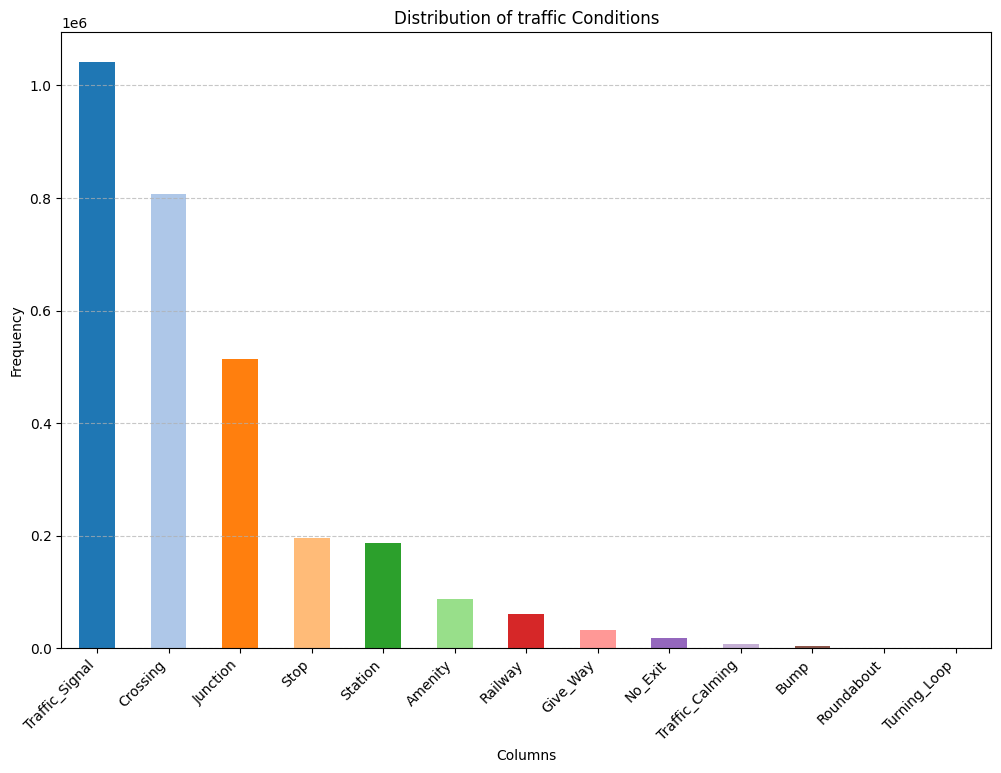

In [22]:
# Plot histograms for traffic conditions
plt.figure(figsize=(12, 8))
US_Accidents[boolean_columns].sum().sort_values(ascending=False).plot(kind='bar', color=plt.get_cmap('tab20')(range(len(color_range))))
plt.title('Distribution of traffic Conditions')
plt.xlabel('Columns')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

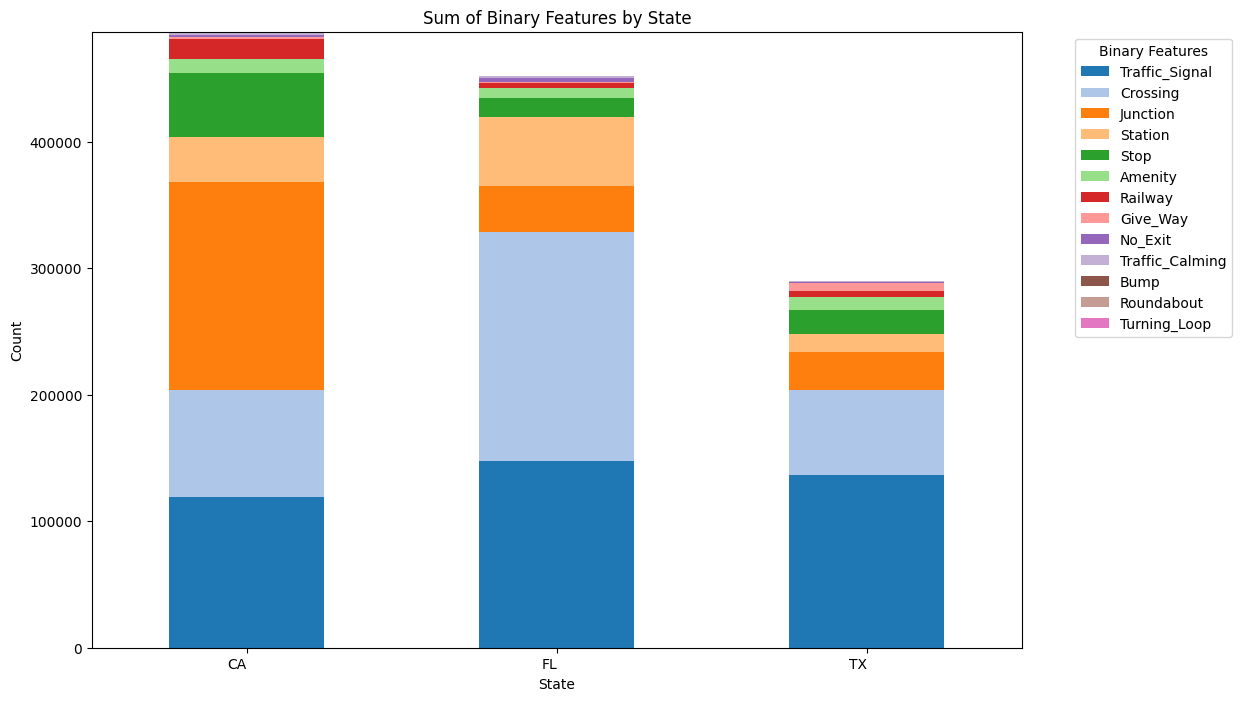

In [23]:
#Identifying the most common traffic conditions in the states with the highest accident rates

#Filter data for the top 3 states with the most accidents
top_states = US_Accidents['State'].value_counts().head(3).index
top_states_data = US_Accidents[US_Accidents['State'].isin(top_states)]

#Calculate sum of each traffic condition for the top states
binary_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
                  'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
                  'Traffic_Signal', 'Turning_Loop']

binary_sums = {}
for column in binary_columns:
    binary_sums[column] = top_states_data.groupby('State')[column].sum()

# Calculate total sum of each traffic condition across all states
total_sums = pd.Series({col: sums.sum() for col, sums in binary_sums.items()})

# Sort traffic condition by total sum in descending order
sorted_binary_features = total_sums.sort_values(ascending=False)

# Get a color palette 'tab20' with the number of colors equal to the number of binary features
color_palette = plt.get_cmap('tab20')(range(len(sorted_binary_features)))

# Create a dictionary to store the color assignment for each feature
color_mapping = {}

# Assign a color to each feature
for i, feature in enumerate(sorted_binary_features.index):
    color_mapping[feature] = color_palette[i]

#Plot stacked bar plot with each traffic condition having a different color
plt.figure(figsize=(12, 8))
bottom = pd.Series(0, index=top_states)
for column in sorted_binary_features.index:
    sums = binary_sums[column]
    sums.plot(kind='bar', stacked=True, figsize=(12, 8), label=column, bottom=bottom, color=color_mapping[column])
    bottom = bottom.add(sums, fill_value=0)

plt.title('Sum of Binary Features by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Binary Features',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0, ha='right')
plt.show()


## Summary and Insights

1. The End_Lat and End_Lng data fields have 44% missing values, rendering them unsuitable for analysis. Similarly, precipitation and wind chill data have approximately 15% missing values.

2. The five cities with the highest number of accidents in the dataset, each recording over 8,000 accidents, are Miami, Houston, Los Angeles, Charlotte, and Dallas.

3. The states with the highest number of accidents are California, Texas, and Florida. In California, the city with the most accidents (Los Angeles) represents a modest 9% of the total accidents in the state, whereas in Texas, the city with the most accidents (Houston) accounts for a substantial 30% of the state's total accidents. In Florida, the city with the most accidents (Miami) represents 22% of the total accidents in the state.

4. The occurrence of accidents decreases significantly in 2023, likely due to data availability only until March 2023.

5. Two distinct patterns are observed between weekdays and weekends. Weekdays account for approximately 85% of total accidents, while weekends only contribute around 15%.

6. Peak accident times during weekdays coincide with high traffic flow, with the first peak occurring at 8:00 and the second at 17:00. On weekends, the peak occurs at 14:00, indicating sustained activity throughout the afternoon, as mornings witness significantly fewer accidents.

7. Analysis of meteorological conditions reveals that the majority of accidents occur under average weather conditions, suggesting no significant influence or deviation from typical weather patterns. Approximately 35.6% of accidents occur under fair weather conditions.

8. Regarding traffic conditions, the majority of accidents involve traffic signals, crossings, or junctions.

9. Discriminating by the three states with the highest accident rates, it is observed that in California, most accidents occur at traffic signals and junctions. In Florida, traffic signals and crossings are more involved than junctions. In Texas, traffic signals predominate, followed by crossings and junctions in lesser proportions.

In [24]:
from sklearn.model_selection import train_test_split


In [25]:
# Print column names to verify available features
print(US_Accidents.columns)

# Update feature selection to match the columns in your dataset
# For example, let's assume 'Temperature(F)', 'Humidity(%)', etc. are available
X = US_Accidents[['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']]  # Adjust based on actual column names
y = US_Accidents['Severity']  # Assuming 'Severity' is still the target

# Proceed with the rest of the steps as before


Index(['Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'Street', 'City',
       'State', 'Country', 'Weather_Timestamp', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')


In [26]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
from sklearn.model_selection import train_test_split

# Split the data into training (70%) and temporary set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary set into validation (50% of the temp set) and test set (50% of the temp set)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Training set: 4936138 samples
Validation set: 1057744 samples
Test set: 1057744 samples


In [28]:
# load libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import pickle
from sklearn.pipeline import Pipeline
import seaborn as sns

In [31]:
print(US_Accidents.columns)


Index(['Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'Street', 'City',
       'State', 'Country', 'Weather_Timestamp', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')


In [32]:
unnamed_columns = [col for col in US_Accidents.columns if 'Unnamed' in col]
print(unnamed_columns)


[]


In [34]:
US_Accidents = US_Accidents.loc[:, ~US_Accidents.columns.str.contains('^Unnamed')]




In [36]:
# split X, y
X = US_Accidents.drop('Severity', axis=1)
y= US_Accidents['Severity']


In [37]:
print(X.shape)


(7051626, 28)


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=60616)

In [45]:
print(X_train.columns)
print(X_test.columns)


Index(['Start_Time', 'End_Time', 'Distance(mi)', 'Street', 'City', 'State',
       'Country', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')
Index(['Start_Time', 'End_Time', 'Distance(mi)', 'Street', 'City', 'State',
       'Country', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, None], 'n_jobs': [-1]}
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, random_state=42)
random_search.fit(X_train, y_train)
